In [1]:
import pandas as pd
import pm4py
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

In [2]:
data = pd.read_csv("../data/running-example.csv", sep=";")

In [3]:
data["Timestamp"] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y:%H.%M')

In [4]:
print(f"Amount of events: {data.shape[0]}")
print(f"Amount of cases: {data.loc[:, 'Case ID'].unique().shape[0]}")

Amount of events: 42
Amount of cases: 6


In [5]:
dataframe = pm4py.format_dataframe(data, case_id='Case ID', activity_key='Activity', timestamp_key='Timestamp')
event_log = pm4py.convert_to_event_log(dataframe)

c:\Users\Dani\AppData\Local\Programs\Python\Python310\lib\site-packages\pm4py\utils.py:508: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


## Liste an Start/End Aktivitäten

In [6]:
pm4py.get_start_activities(event_log)

{'register request': 6}

In [7]:
sorted(pm4py.get_end_activities(event_log).items(), key=lambda x:x[1], reverse=True)

[('reject request', 3), ('pay compensation', 3)]

# Petri nets

## Erstellung Petrinetze

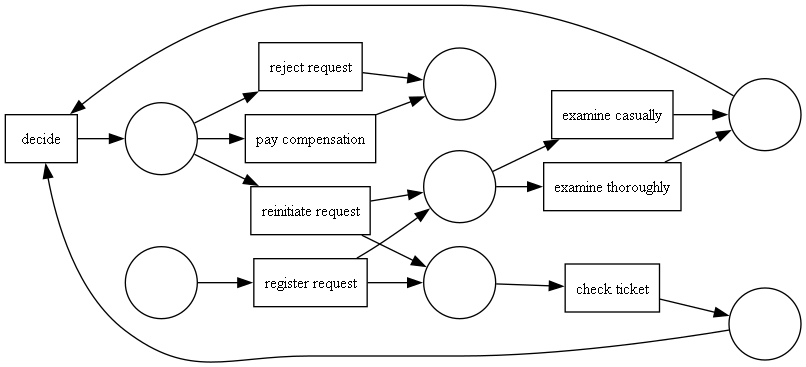

In [8]:
petrinet_alpha, initial_markings, final_markings = pm4py.discover_petri_net_alpha(dataframe)
pm4py.view_petri_net(petrinet_alpha)

## Einfärben

In [9]:
def getDeco(petrinet, initial_marking, final_marking, colorArc=False):
    deco = {}
    for pl in petrinet.places:
        if pl in initial_marking:
            deco[pl] = {'color': 'green', 'label': ''}
        if pl in final_marking:
            deco[pl] = {'color': 'orange', 'label': ''}
    if colorArc:
        for arc in petrinet.arcs:
            deco[arc] = {'color': 'red', 'label': 'aa', 'penwidth': '5'}
    return deco

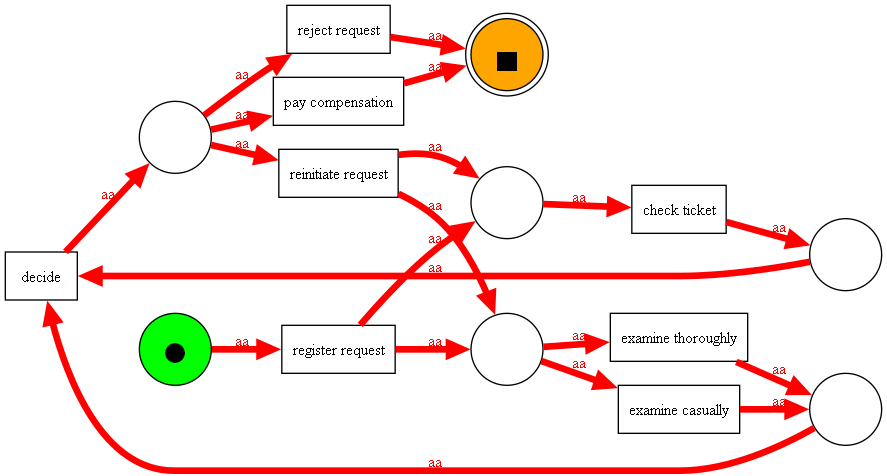

In [10]:
pm4py.view_petri_net(petrinet_alpha, initial_markings, final_markings, decorations=getDeco(petrinet_alpha, initial_markings, final_markings, True))

In [11]:
list(petrinet_alpha.places)[1].in_arcs

{(check ticket, 'check ticket')->({'check ticket'}, {'decide'})}

In [16]:
list(petrinet_alpha.transitions)

{(check ticket, 'check ticket'),
 (decide, 'decide'),
 (examine casually, 'examine casually'),
 (examine thoroughly, 'examine thoroughly'),
 (pay compensation, 'pay compensation'),
 (register request, 'register request'),
 (reinitiate request, 'reinitiate request'),
 (reject request, 'reject request')}

In [13]:
index = 4
transition_name = list(petrinet_alpha.transitions)[index].name
transition_in = [x.source for x in list(list(petrinet_alpha.transitions)[index].in_arcs)]
transition_out = [x.replace("{", "").replace("}", "").replace("(", "").replace(")", "").replace('"', "").replace("'", "").replace(",", "").strip() for x in str(list(list(petrinet_alpha.transitions)[index].out_arcs)[0]).split("->")[1].split("}") if x]

print(f"Transition name: {transition_name}")
print(f"Transition in: {transition_in}")
print(f"Transition out: {transition_out}")

Transition name: register request
Transition in: [start]
Transition out: ['reinitiate request register request', 'check ticket', '']


In [14]:
transition_out[0]

'reinitiate request register request'

In [ ]:
text = str(list(list(petrinet_alpha.places)[1].out_arcs)[0].target.out_arcs)
print(f"Name: {list(list(petrinet_alpha.places)[1].out_arcs)[0].target.label}")
text

Name: register request


"{(register request, 'register request')->({'register request', 'reinitiate request'}, {'check ticket'}), (register request, 'register request')->({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'})}"

In [ ]:
import re
matches = re.findall(r'\{([^}]*)\}', text)
all_matches = []

#last_match = matches[-3] if matches else None

In [ ]:
matches

["(register request, 'register request')->({'register request', 'reinitiate request'",
 "'check ticket'",
 "'register request', 'reinitiate request'",
 "'examine thoroughly', 'examine casually'"]

In [ ]:
last_match.replace("'", "").split(", ")

['check ticket']